In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv("../data/车贷违约预测.csv",encoding='gbk')
Data.head()

,客户编号,已发货款,资产成本,贷款与资产比列,品牌,骑车销售商,车厂,出生日期,货款日期,地区,...,尚未还清有效贷款总额,已批准贷款总额,已发放贷款总额,每月还款总额,贷款与已还贷款比列,主账户还款期数,次账户还款期数,贷款与已批准贷款比列,总贷款次数与总有效贷款次数比,工作类型
0,601758,65532,78990,84.38,136,20490,45,1981,2018,8,...,0,0,0,0,1.00,0,0,1.0,1.00,0
1,519488,56759,65325,89.55,61,22778,86,1967,2018,6,...,2054139,2036500,2036500,34455,0.99,59,0,1.0,1.33,1
2,447579,58413,67960,89.02,5,15663,86,1977,2018,9,...,0,0,0,0,1.00,0,0,1.0,1.00,1
3,648134,72317,99750,73.68,76,17242,48,1995,2018,8,...,0,13813,13813,0,13814.00,13813,0,1.0,2.00,0
4,458210,50078,65450,79.45,146,14181,45,1974,2018,17,...,467161,550000,550000,12863,1.18,42,0,1.0,1.06,1


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199717 entries, 0 to 199716
Data columns (total 49 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   客户编号            199717 non-null  int64  
 1   已发货款            199717 non-null  int64  
 2   资产成本            199717 non-null  int64  
 3   贷款与资产比列         199717 non-null  float64
 4   品牌              199717 non-null  int64  
 5   骑车销售商           199717 non-null  int64  
 6   车厂              199717 non-null  int64  
 7   出生日期            199717 non-null  int64  
 8   货款日期            199717 non-null  int64  
 9   地区              199717 non-null  int64  
 10  对接员工编号          199717 non-null  int64  
 11  是否填写手机号         199717 non-null  int64  
 12  受否填写身份证         199717 non-null  int64  
 13  是否出具驾驶证         199717 non-null  int64  
 14  是否填写护照          199717 non-null  int64  
 15  信用评分            199717 non-null  int64  
 16  主账户贷款次数         199717 non-null  int64  
 17  主账户有效贷款次数 

## 查看是否有缺失值

In [4]:
Data.rename(columns={'骑车销售商':'汽车销售商','受否填写身份证':'是否填写身份证'},inplace=True)
Data.isna().sum()

客户编号              0
已发货款              0
资产成本              0
贷款与资产比列           0
品牌                0
汽车销售商             0
车厂                0
出生日期              0
货款日期              0
地区                0
对接员工编号            0
是否填写手机号           0
是否填写身份证           0
是否出具驾驶证           0
是否填写护照            0
信用评分              0
主账户贷款次数           0
主账户有效贷款次数         0
主账户中尚未还清有效贷款      0
主账户中已批准的贷款        0
主账户中已发放贷款         0
次账户贷款次数           0
次账户有效贷款次数         0
次账户中尚未还清有效贷款      0
次账户中已批准贷款         0
次账户中已发放贷款         0
主账户每月还款           0
次账户没用还款           0
近六个月新贷款次数         0
近六个月违约次数          0
平均贷款期限            0
第一次贷款距今时间         0
贷款查询次数            0
是否违约              0
贷款与资产比            0
贷款总次数             0
主账户无效贷款次数         0
次账户无效贷款次数         0
无效贷款总次数           0
尚未还清有效贷款总额        0
已批准贷款总额           0
已发放贷款总额           0
每月还款总额            0
贷款与已还贷款比列         0
主账户还款期数           0
次账户还款期数           0
贷款与已批准贷款比列        0
总贷款次数与总有效贷款次数比    0
工作类型              0
dtype: int64

In [5]:
Data['客户编号'] = Data['客户编号'].astype('str')
Data['对接员工编号'] = Data['对接员工编号'].astype('str')
Data['品牌'] = Data['品牌'].astype('str')
Data['汽车销售商'] = Data['汽车销售商'].astype('str')
Data['车厂'] = Data['车厂'].astype('str')

In [6]:
Data.nunique()

客户编号              199717
已发货款               22536
资产成本               43627
贷款与资产比列             6457
品牌                    82
汽车销售商               2935
车厂                    11
出生日期                  48
货款日期                   1
地区                    22
对接员工编号              3257
是否填写手机号                1
是否填写身份证                1
是否出具驾驶证                2
是否填写护照                 2
信用评分                 572
主账户贷款次数              106
主账户有效贷款次数             38
主账户中尚未还清有效贷款       62763
主账户中已批准的贷款         39186
主账户中已发放贷款          42246
次账户贷款次数               37
次账户有效贷款次数             22
次账户中尚未还清有效贷款        2805
次账户中已批准贷款           1946
次账户中已发放贷款           2232
主账户每月还款            25705
次账户没用还款             1690
近六个月新贷款次数             24
近六个月违约次数              14
平均贷款期限               100
第一次贷款距今时间            100
贷款查询次数                24
是否违约                   2
贷款与资产比            180402
贷款总次数                106
主账户无效贷款次数             96
次账户无效贷款次数             28
无效贷款总次数               97
尚未还清有效贷款总额         63779


## 查看有没有异常值

In [7]:
Data.describe(include="all")

,客户编号,已发货款,资产成本,贷款与资产比列,品牌,汽车销售商,车厂,出生日期,货款日期,地区,...,尚未还清有效贷款总额,已批准贷款总额,已发放贷款总额,每月还款总额,贷款与已还贷款比列,主账户还款期数,次账户还款期数,贷款与已批准贷款比列,总贷款次数与总有效贷款次数比,工作类型
count,199717,199717.000000,1.997170e+05,199717.000000,199717,199717,199717,199717.000000,199717.0,199717.000000,...,1.997170e+05,1.997170e+05,1.997170e+05,1.997170e+05,199717.00,1.997170e+05,1.997170e+05,1.997170e+05,199717.000000,199717.000000
unique,199717,NaN,NaN,NaN,82,2935,11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,505788,NaN,NaN,NaN,2,18317,86,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,11322,1191,94164,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,54256.272280,7.582391e+04,74.643960,NaN,NaN,NaN,1983.876921,2018.0,7.245222,...,1.743125e+05,2.299233e+05,2.294165e+05,1.344553e+04,inf,5.059582e+04,2.928000e+03,5.535709e+02,1.438913,0.487475
std,NaN,12977.656996,1.892894e+04,11.490485,NaN,NaN,NaN,9.805565,0.0,4.481338,...,9.813640e+05,2.530977e+06,2.534185e+06,1.531618e+05,NaN,2.275670e+06,1.065410e+05,1.141343e+05,0.792213,0.561915
min,NaN,13320.000000,3.700000e+04,10.030000,NaN,NaN,NaN,1949.000000,2018.0,1.000000,...,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000e+00,-110000.33,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,NaN,46977.000000,6.571400e+04,68.730000,NaN,NaN,NaN,1977.000000,2018.0,4.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,0.000000
50%,NaN,53703.000000,7.092200e+04,76.670000,NaN,NaN,NaN,1986.000000,2018.0,6.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,0.000000
75%,NaN,60247.000000,7.915900e+04,83.590000,NaN,NaN,NaN,1992.000000,2018.0,10.000000,...,3.818900e+04,6.720600e+04,6.508500e+04,2.094000e+03,1.26,2.500000e+01,0.000000e+00,1.000000e+00,1.670000,1.000000


可以看出，‘贷款与已还贷款比列’这一列数据有异常，有无穷数据

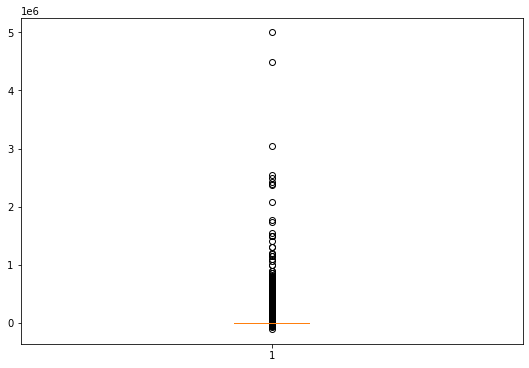

In [8]:
plt.figure(figsize=(9,6))
plt.boxplot(Data['贷款与已还贷款比列'],showmeans = True)
# Data['贷款与已还贷款比列'].plot.box()
plt.show()

In [9]:
Q1,Q3=np.percentile(Data['贷款与已还贷款比列'],(0.25,0.75) )
QD=Q3-Q1
up_whisker=Q3+1.5*QD
low_whisker=Q1-1.5*QD 
up_whisker

1.825

In [10]:
# 异常的数据
Data_t = Data[(Data['贷款与已还贷款比列'] > up_whisker) | (Data['贷款与已还贷款比列'] < low_whisker)]
Data_t.shape

(29708, 49)

In [11]:
# 将这些异常的数据删掉
drop_index = Data_t.index.values
Data = Data.drop(drop_index)
Data.shape

(170009, 49)

In [12]:
Data.describe()

,已发货款,资产成本,贷款与资产比列,出生日期,货款日期,地区,是否填写手机号,是否填写身份证,是否出具驾驶证,是否填写护照,...,尚未还清有效贷款总额,已批准贷款总额,已发放贷款总额,每月还款总额,贷款与已还贷款比列,主账户还款期数,次账户还款期数,贷款与已批准贷款比列,总贷款次数与总有效贷款次数比,工作类型
count,170009.000000,1.700090e+05,170009.000000,170009.000000,170009.0,170009.000000,170009.0,170009.0,170009.000000,170009.000000,...,1.700090e+05,1.700090e+05,1.700090e+05,1.700090e+05,170009.000000,1.700090e+05,1.700090e+05,1.700090e+05,170009.000000,170009.000000
mean,54191.003559,7.599110e+04,74.408606,1984.246616,2018.0,7.307807,1.0,1.0,0.023046,0.001994,...,1.907015e+05,2.219020e+05,2.219542e+05,1.353569e+04,1.067804,4.267298e+04,2.550068e+03,6.272278e+02,1.339105,0.487274
std,13017.412232,1.902326e+04,11.546767,9.814744,0.0,4.512920,0.0,0.0,0.150050,0.044610,...,1.046910e+06,1.210851e+06,1.218893e+06,1.591537e+05,0.189448,4.300190e+05,1.030276e+05,1.236638e+05,0.734318,0.566081
min,13320.000000,3.700000e+04,10.030000,1949.000000,2018.0,1.000000,1.0,1.0,0.000000,0.000000,...,-2.013721e+06,0.000000e+00,0.000000e+00,0.000000e+00,-1.060000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,46849.000000,6.579400e+04,68.450000,1977.000000,2018.0,4.000000,1.0,1.0,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,0.000000
50%,53659.000000,7.103600e+04,76.330000,1986.000000,2018.0,6.000000,1.0,1.0,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,0.000000
75%,60213.000000,7.950500e+04,83.340000,1992.000000,2018.0,11.000000,1.0,1.0,0.000000,0.000000,...,3.470600e+04,4.251100e+04,4.140000e+04,1.225000e+03,1.000000,8.000000e+00,0.000000e+00,1.000000e+00,1.450000,1.000000
max,990572.000000,1.628992e+06,95.000000,2000.000000,2018.0,22.000000,1.0,1.0,1.000000,1.000000,...,9.652492e+07,1.058657e+08,1.057557e+08,2.564281e+07,1.820000,5.326646e+07,1.980000e+07,5.000000e+07,18.000000,2.000000


## 失衡数据判断并处理

In [13]:
Data['是否违约'].value_counts()

0    139343
1     30666
Name: 是否违约, dtype: int64

In [14]:
Data['是否违约'].value_counts()[1] / Data['是否违约'].count()

0.18037868583427935

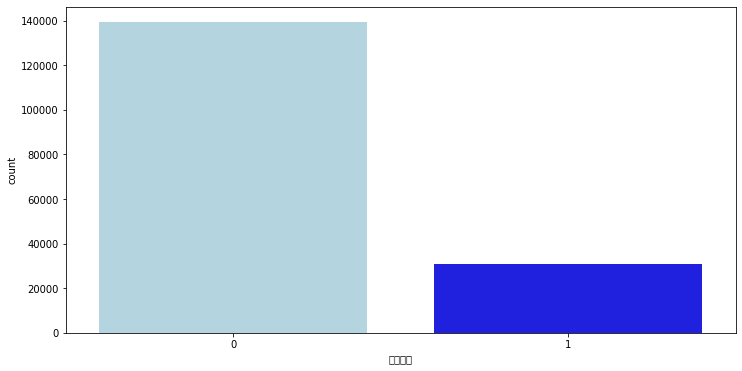

In [15]:
import seaborn as sns
my_pal = {0: 'lightblue', 1: 'blue'}
plt.figure(figsize = (12, 6))
ax = sns.countplot(x = '是否违约',data = Data, palette = my_pal)
plt.show()

#### 数据没有不平衡

## 哑变量转码

In [16]:
col2 = []
col1 = []
k = Data['地区'].nunique()
for i in range(1,k+1):
    col1.append(i)
    col2.append('地区' + str(i))
dic = dict(zip(col1,col2))
dd1 = pd.get_dummies(Data['地区'])
dd1.rename(columns=dic,inplace = True)
dd1.head()

,地区1,地区2,地区3,地区4,地区5,地区6,地区7,地区8,地区9,地区10,...,地区13,地区14,地区15,地区16,地区17,地区18,地区19,地区20,地区21,地区22
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
col2 = []
col1 = []
t = Data['车厂'].value_counts().index
Data['车厂'].value_counts()
for i in t:
    col1.append(str(i))
    col2.append('车厂' + str(i))
dic = dict(zip(col1,col2))
dd2 = pd.get_dummies(Data['车厂'])
dd2.rename(columns=dic,inplace = True)
dd2.head()

,车厂120,车厂145,车厂152,车厂153,车厂156,车厂45,车厂48,车厂49,车厂51,车厂67,车厂86
0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0


In [18]:
col2 = []
col1 = []
t = Data['工作类型'].value_counts().index
Data['工作类型'].value_counts()
for i in t:
    col1.append(i)
    col2.append('工作类型' + str(i))
dic = dict(zip(col1,col2))
dd3 = pd.get_dummies(Data['工作类型'])
dd3.rename(columns=dic,inplace = True)
dd3.head()

,工作类型0,工作类型1,工作类型2
0,1,0,0
1,0,1,0
2,0,1,0
4,0,1,0
5,1,0,0


In [19]:
Data_1 = Data.copy()
Data_1.drop(labels = ['工作类型','车厂','地区'],axis = 1,inplace = True)
Data_1 = pd.concat([Data_1,dd1,dd2,dd3],axis = 1)
Data_1.head()

,客户编号,已发货款,资产成本,贷款与资产比列,品牌,汽车销售商,出生日期,货款日期,对接员工编号,是否填写手机号,...,车厂156,车厂45,车厂48,车厂49,车厂51,车厂67,车厂86,工作类型0,工作类型1,工作类型2
0,601758,65532,78990,84.38,136,20490,1981,2018,2801,1,...,0,1,0,0,0,0,0,1,0,0
1,519488,56759,65325,89.55,61,22778,1967,2018,3060,1,...,0,0,0,0,0,0,1,0,1,0
2,447579,58413,67960,89.02,5,15663,1977,2018,1032,1,...,0,0,0,0,0,0,1,0,1,0
4,458210,50078,65450,79.45,146,14181,1974,2018,1828,1,...,0,1,0,0,0,0,0,0,1,0
5,616513,63882,79605,82.91,152,14470,1993,2018,912,1,...,0,0,0,0,1,0,0,1,0,0


## 划分特征列和标签列

In [20]:
X = Data_1.drop({'是否违约'},axis =1)
Y = Data_1['是否违约']
X.head()

,客户编号,已发货款,资产成本,贷款与资产比列,品牌,汽车销售商,出生日期,货款日期,对接员工编号,是否填写手机号,...,车厂156,车厂45,车厂48,车厂49,车厂51,车厂67,车厂86,工作类型0,工作类型1,工作类型2
0,601758,65532,78990,84.38,136,20490,1981,2018,2801,1,...,0,1,0,0,0,0,0,1,0,0
1,519488,56759,65325,89.55,61,22778,1967,2018,3060,1,...,0,0,0,0,0,0,1,0,1,0
2,447579,58413,67960,89.02,5,15663,1977,2018,1032,1,...,0,0,0,0,0,0,1,0,1,0
4,458210,50078,65450,79.45,146,14181,1974,2018,1828,1,...,0,1,0,0,0,0,0,0,1,0
5,616513,63882,79605,82.91,152,14470,1993,2018,912,1,...,0,0,0,0,1,0,0,1,0,0


## 特征筛选

In [21]:
# 特征筛选，选出和样本标签之间存在显著相关性（p<0.05)的特征，从而过滤掉对模型预测贡献不大的特征
from sklearn.feature_selection import f_regression

F,p=f_regression(X,Y)  # 一个特征对应一个F值和p值
k=F.shape[0] - (p>0.05).sum() # 去掉p值<=0.05的特征，k就是剩下的特征数量
k

65

In [22]:
from sklearn.feature_selection import SelectKBest

X_f=SelectKBest(f_regression,k=k).fit_transform(X,Y) 
X_f.shape

(170009, 65)

## 划分测试集和训练集

In [23]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X_f,Y,test_size=0.2,random_state=420)

## 逻辑回归模型

In [24]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state = 420)
model1.fit(Xtrain,Ytrain)
model1.score(Xtest,Ytest),model1.score(Xtrain,Ytrain)

(0.8216575495559085, 0.819097546449815)

## 随机森林模型

In [25]:
# 用原来的特征试一下
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=420)

In [26]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators = 100,random_state = 20)
model2.fit(Xtrain,Ytrain)
model2.score(Xtest,Ytest),model2.score(Xtrain,Ytrain)

(0.8199811775777895, 0.9999852948745285)

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
model3 = GradientBoostingClassifier(random_state = 20)
model3.fit(Xtrain,Ytrain)
model3.score(Xtest,Ytest),model3.score(Xtrain,Ytrain)

(0.8215987294865008, 0.8192151874535869)

In [29]:
from sklearn.ensemble import RandomForestRegressor

est = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False)

GS = GridSearchCV(cv=5, 
             estimator = est,
            n_jobs=1,
             param_grid={'max_depth': range(1, 10),
                         'n_estimators': range(1, 200, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
GS.fit(Xtrain,Ytrain)
GS.best_params_

Error: Pip module Unable to parse debugpy output, please log an issue with https://github.com/microsoft/vscode-jupyter is required for debugging cells. You will need to install it to debug cells.

In [ ]:
# 查看最优参数组合
GS.best_params_

In [ ]:
# 用上面得到的最优参数组合重新实例化模型
rfr=RandomForestRegressor(n_estimators=GS.best_params_['n_estimators'],
                         max_depth=GS.best_params_['max_depth']).fit(Xtrain,Ytrain)

In [ ]:
rfr.score(Xtest,Ytest),rfr.score(Xtrain,Ytrain)